#                            Pyhton Questions

Python Q1)Write an efficient algorithm that searches for a value target in an m x n integer matrix. This matrix has the following properties:

1.Integers in each row are sorted from right to left.

2.The first integer of each row is greater than the last integer of the previous row.

 Example-: 

Input: matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3
Output: True

In [6]:
#1) Answer
def search_matrix(matrix, target):

    rows = len(matrix)
    cols = len(matrix[0])

    row = 0
    col = cols - 1  # Start from the top-right corner

    while row < rows and col >= 0:
        if matrix[row][col] == target:
            return True

        # Move left if target is smaller than current element
        if target < matrix[row][col]:
            col -= 1

        # Move down if target is larger than or equal to current element (exploiting the row-wise sorting property)
        else:
            row += 1

    return False
# for example 
matrix = [
    [1, 3, 5, 7],
    [10, 11, 16, 20],
    [23, 30, 34, 60]
]
target = 3

output = search_matrix(matrix, target)
print(output)


True


Python Q2).  Write a program that takes a string as input, and counts the frequency of each word in the string, there might  be repeated characters in the string. Your task is to find the highest frequency and returns the length of the  highest-frequency word. 

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide  an explanation for the same.  

Example input - string = “write write write all the number from from from 1 to 100” 

Example output - 5 

Explanation - From the given string we can note that the most frequent words are “write” and “from” and  the maximum value of both the values is “write” and its corresponding length is 5

In [24]:
def highest_frequency_word_length(string):

    word_counts = {}
    words = string.split()

    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1

    max_frequency = max(word_counts.values())
    highest_frequency_words = [word for word, count in word_counts.items() if count == max_frequency]

    return len(highest_frequency_words[0])  # Return the length of the first highest-frequency word

# Test cases
test_cases = [
    ("write write write all the number from from from 1 to 100"),  # Example input
    ("hello world hello hello world"),  # Test case 1
    ("apple banana apple banana orange apple"),  # Test case 2
]

for string in test_cases:
    output = highest_frequency_word_length(string)
    print(f"Input: {string}\nOutput:highest frequency word's length is {output}\n")



Input: write write write all the number from from from 1 to 100
Output:highest frequency word's length is 5

Input: hello world hello hello world
Output:highest frequency word's length is 5

Input: apple banana apple banana orange apple
Output:highest frequency word's length is 5



# --------------------------------------------------------------------- 
# Machine Learning

 Question: 1

1. Imagine you have a dataset where you have different Instagram features like Username , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 
Dataset This is the Dataset You can use this dataset for this question. 

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
df= pd.read_csv("instagram_reach.csv")
df.head(3)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25


In [83]:
df=df.drop(["Unnamed: 0", "S.No"], axis=1)
df.head(1)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139


In [56]:
df.shape

(100, 6)

In [57]:
df.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [58]:
df['Caption'].fillna('', inplace=True)

In [59]:
df.isnull().sum().sum()

0

In [63]:
df.duplicated().sum()

0

In [64]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

# Assuming df is your DataFrame
for column in df.columns:
    df[column] = Le.fit_transform(df[column])
df.sample(5)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
23,64,11,93,6,2,3
94,76,94,3,63,5,15
17,4,56,42,19,6,31
28,75,24,31,5,6,30
80,66,93,14,79,2,18


In [73]:
X = df[["USERNAME", "Caption", "Hashtags", "Followers"]]  # Input features
y_likes = df["Likes"]  # Target variable for likes prediction
y_time = df["Time since posted"]  # Target variable for time prediction

X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(X, y_likes, y_time, test_size=0.2, random_state=42)


In [77]:
# Create and train the model for likes prediction
likes_model = LinearRegression()
likes_model.fit(X_train, y_likes_train)

# Make predictions on the testing set
y_likes_predicted = likes_model.predict(X_test)

# Evaluate performance
mse_likes = mean_squared_error(y_likes_test, y_likes_predicted)
r2_likes = r2_score(y_likes_test, y_likes_predicted)
print("Mean Squared Error (Likes):", mse_likes)
print("R-squared (Likes):", r2_likes)


Mean Squared Error (Likes): 173.63346939931424
R-squared (Likes): 0.10566208990940262


In [81]:
from sklearn.svm import SVR

svm_model = SVR() 
svm_model.fit(X_train, y_likes_train)
y_likes_predicted = svm_model.predict(X_test)

y_likes_predicted

array([15.62867873, 13.73326155, 22.69622353, 15.82613044, 15.26842612,
       16.61940681, 20.97326427, 17.60276543, 14.93749615, 18.63378492,
       14.86950097, 21.21335426, 19.35291224, 18.62064545, 19.15385718,
       17.49497132, 15.50821462, 20.55645601, 23.01057966, 15.17703292])

.

Q 2.1)Explain how you can implement ML in a real world application.

Answer)

1. Problem Identification and Data Gathering:

Define the problem: Clearly articulate the specific business or user problem you aim to solve with ML.
Collect relevant data: Gather historical data that captures patterns and relationships essential for prediction or decision-making. Ensure data quality and relevance.

2. Data Preparation and Preprocessing:

Clean and preprocess data: Address missing values, outliers, inconsistencies, and format data appropriately for model training.
Feature engineering: Create new features or transform existing ones to enhance informativeness and model performance.
Split data: Divide data into training, validation, and testing sets for model development and evaluation.

3. Model Selection and Training:

Choose an appropriate ML algorithm: Select a suitable algorithm based on the problem type (e.g., classification, regression, clustering), data characteristics, and desired outcomes.
Train the model: Feed the training data into the chosen algorithm to learn patterns and relationships.
Tune hyperparameters: Adjust model settings to optimize performance on the validation set.

4. Evaluation and Refinement:

Evaluate performance: Use metrics like accuracy, precision, recall, F1-score, or mean squared error to assess the model's performance on the testing set.
Refine the model: If performance is unsatisfactory, consider feature engineering, hyperparameter tuning, algorithm selection, or collecting more data.

5. Deployment and Integration:

Deploy the model: Integrate the trained model into the application or system for real-time predictions or decisions.
Monitor performance: Continuously track model performance and retrain as needed to maintain accuracy and adapt to changes in data patterns.

.


Q2.2) Train an SVM regressor on : Bengaluru housing dataset

Must include in details:
 - EDA
 - Feature engineering 

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [132]:
df2= pd.read_csv("Bengaluru_House_Data.csv")
df2.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [133]:
df2.shape

(13320, 9)

In [134]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [137]:
df2.duplicated().sum()

529

In [138]:
df2.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Majorly missing values are in society, balcony, bath, size and location. We can drop society column as too many missing values



In [127]:
for col in df2.columns:
    print(df2[col].value_counts())
    print("*"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Nov               1
16-Jul               1
17-Jan               1
14-Jul               1
15-Jun               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                    540
Sarjapur  Road                399
Electronic City               302
Kanakpura Road                273
Thanisandra                   234
                             ... 
Vijaya Bank Colony              1
Yemlur, Old Airport Road,       1
Akash Nagar                     1
RMC YARD                        1
Sathanur                        1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591


In [153]:
df2.describe()

,bath,balcony,price,total_sqft_numeric
count,7337.000000,7337.000000,7337.000000,7337.000000
mean,2.454545,1.662532,96.875385,1505.075226
std,0.861693,0.753620,105.686651,930.802964
min,1.000000,0.000000,8.000000,11.000000
25%,2.000000,1.000000,50.000000,1120.000000
50%,2.000000,2.000000,70.000000,1310.000000
75%,3.000000,2.000000,105.000000,1655.000000
max,9.000000,3.000000,2700.000000,36000.000000


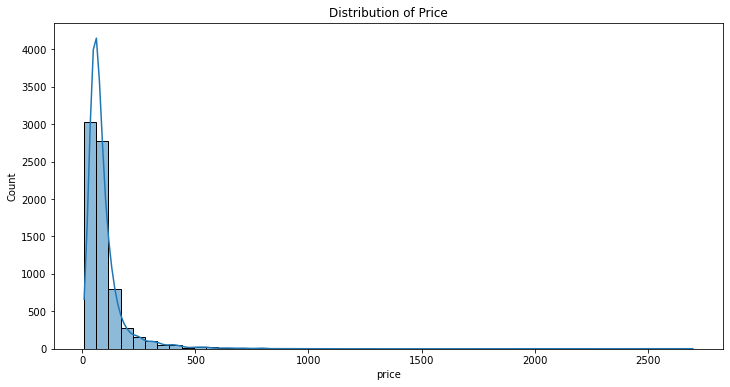

In [155]:
# Visualize the distribution of the target variable (price)
plt.figure(figsize=(12, 6))
sns.histplot(df2['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()

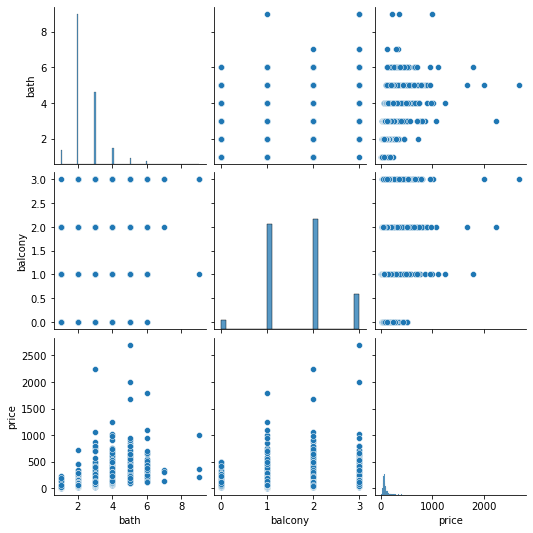

In [157]:
# Visualize relationships between numerical features and the target variable
sns.pairplot(df2[['total_sqft', 'bath', 'balcony', 'price']])
plt.show()

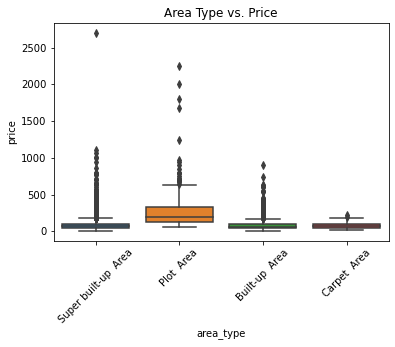

In [159]:
# Visualize relationships between categorical features and the target variable
sns.boxplot(x='area_type', y='price', data=df2)
plt.xticks(rotation=45)
plt.title('Area Type vs. Price')
plt.show()

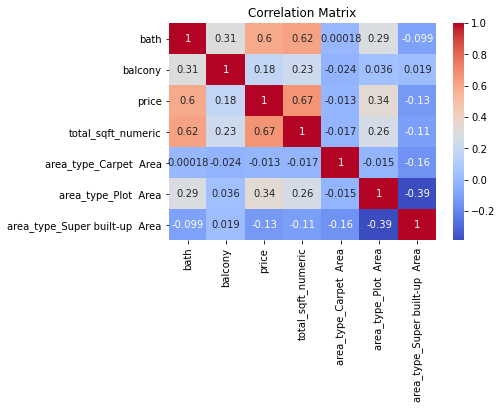

In [160]:
# Drop unnecessary columns
data = df2.drop(['availability', 'location', 'society'], axis=1)

# Convert categorical variables into numerical using one-hot encoding
data = pd.get_dummies(data, columns=['area_type'], drop_first=True)

# Handle missing values
data['bath'].fillna(data['bath'].median(), inplace=True)
data['balcony'].fillna(data['balcony'].median(), inplace=True)

# Check the correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [166]:
# Split the data into features and target variable
data['size'] = data['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else x)

X = data.drop('price', axis=1)
y = data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [169]:
# Train the SVM regressor
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Calculate R-squared
r_squared = svm_regressor.score(X_test_scaled, y_test)
print(f'R-squared: {r_squared}')


Mean Squared Error: 11616.038082881889
R-squared: 0.1015710117522125
